In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [6]:
# Reference data files *** USE ONLY ONE FILE IF ONLY ADDRESSING ONE QUESTION ***
data_path = "output_data/crime_weather_merged.csv"

# Read the data files 
data = pd.read_csv(data_path)

#View data
data.tail()

,ID,Year,Start Date,Start Time,Hour,Offense Group,Offense,Offense Text,Max Temp (f),Min Temp (f),Avg Temp (f),Total Precipitation (in),Avg Humidity (%),Day Condition,Hour Temp (f),Hour Condition,Hour Precipitation (in),Hour Humidity (%)
27556,27556,2023,2023-02-05,23:00:00,11:00PM,violent,assault w/dangerous weapon,assault w/dangerous weapon,50.9,30.0,41.1,0.0,61.0,Overcast,42.5,Mist,0.0,95.0
27557,27557,2023,2023-02-05,23:00:00,11:00PM,property,theft f/auto,theft f/auto,50.9,30.0,41.1,0.0,61.0,Overcast,42.5,Mist,0.0,95.0
27558,27558,2023,2023-02-05,23:21:00,11:00PM,property,theft f/auto,theft f/auto,50.9,30.0,41.1,0.0,61.0,Overcast,42.5,Mist,0.0,95.0
27559,27559,2023,2023-02-05,23:40:00,11:00PM,property,motor vehicle theft,motor vehicle theft,50.9,30.0,41.1,0.0,61.0,Overcast,42.5,Mist,0.0,95.0
27560,27560,2023,2023-02-05,23:55:00,11:00PM,property,theft f/auto,theft f/auto,50.9,30.0,41.1,0.0,61.0,Overcast,42.5,Mist,0.0,95.0


In [31]:
#View data types
data.dtypes

ID                            int64
Year                          int64
Start Date                   object
Start Time                   object
Hour                         object
Offense Group                object
Offense                      object
Offense Text                 object
Max Temp (f)                float64
Min Temp (f)                float64
Avg Temp (f)                float64
Total Precipitation (in)    float64
Avg Humidity (%)            float64
Day Condition                object
Hour Temp (f)               float64
Hour Condition               object
Hour Precipitation (in)     float64
Hour Humidity (%)           float64
dtype: object

In [25]:
#Group data by Hour Temp
crime_by_temp = data.groupby("Hour Temp (f)").count()["ID"]

#Group data by Hour Humidity
crime_by_humid = data.groupby("Hour Humidity (%)").count()["ID"]

#Group data by Hour Precip
crime_by_precip = data.groupby("Hour Precipitation (in)").count()["ID"]

#Group data by Hour Condition
crime_by_cond = data.groupby("Hour Condition").count()["ID"]

crime_by_humid

Hour Humidity (%)
20.0       5
21.0      10
22.0      20
23.0      40
24.0      48
        ... 
96.0     379
97.0     340
98.0     368
99.0     237
100.0     56
Name: ID, Length: 81, dtype: int64

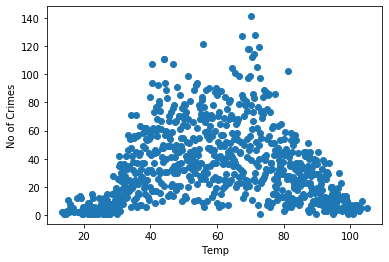

In [26]:
plt.scatter(crime_by_temp.index,crime_by_temp.values)
plt.xlabel('Temp')
plt.ylabel('No of Crimes')
plt.show()

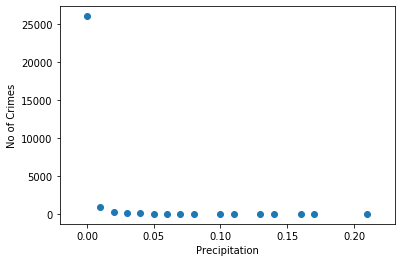

In [29]:
plt.scatter(crime_by_precip.index,crime_by_precip.values)
plt.xlabel('Precipitation')
plt.ylabel('No of Crimes')
plt.show()

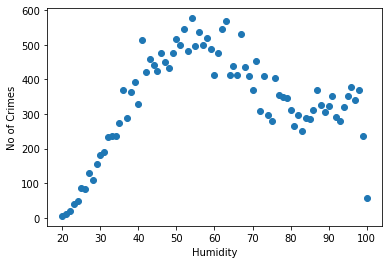

In [30]:
plt.scatter(crime_by_humid.index,crime_by_humid.values)
plt.xlabel('Humidity')
plt.ylabel('No of Crimes')
plt.show()

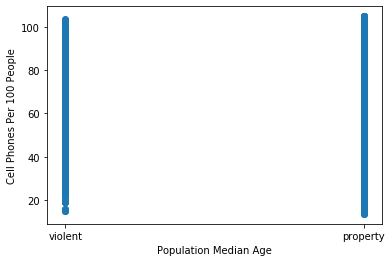

In [7]:
plt.scatter(crime_by_temp.iloc[:,5],data.iloc[:,14])
plt.xlabel('Population Median Age')
plt.ylabel('Cell Phones Per 100 People')
plt.show()

In [36]:
temp_condition = (data["Hour Temp (f)"]>40.0) & (data["Hour Temp (f)"]<80.0)
humid_condition = (data["Hour Humidity (%)"]>50.0) & (data["Hour Humidity (%)"]<80.0)
precip_condition = (data["Hour Precipitation (in)"]<0.02)
data_filter = data.loc[temp_condition & humid_condition & precip_condition]
data_filter.head()

,ID,Year,Start Date,Start Time,Hour,Offense Group,Offense,Offense Text,Max Temp (f),Min Temp (f),Avg Temp (f),Total Precipitation (in),Avg Humidity (%),Day Condition,Hour Temp (f),Hour Condition,Hour Precipitation (in),Hour Humidity (%)
110,110,2022,2022-02-07,18:00:00,6:00PM,property,theft f/auto,theft f/auto,46.9,27.7,38.0,0.0,61.0,Cloudy,43.7,Clear,0.0,51.0
111,111,2022,2022-02-07,18:48:00,6:00PM,property,theft/other,theft/other,46.9,27.7,38.0,0.0,61.0,Cloudy,43.7,Clear,0.0,51.0
112,112,2022,2022-02-07,18:53:00,6:00PM,property,motor vehicle theft,motor vehicle theft,46.9,27.7,38.0,0.0,61.0,Cloudy,43.7,Clear,0.0,51.0
113,113,2022,2022-02-07,19:00:00,7:00PM,property,theft f/auto,theft f/auto,46.9,27.7,38.0,0.0,61.0,Cloudy,41.2,Clear,0.0,56.0
114,114,2022,2022-02-07,19:17:00,7:00PM,property,motor vehicle theft,motor vehicle theft,46.9,27.7,38.0,0.0,61.0,Cloudy,41.2,Clear,0.0,56.0


In [34]:
data["Hour Temp (f)"]>40.0


0        False
1        False
2        False
3        False
4        False
         ...  
27556     True
27557     True
27558     True
27559     True
27560     True
Name: Hour Temp (f), Length: 27561, dtype: bool

In [37]:
#Group data by Hour Temp
crime_by_temp2 = data_filter.groupby("Hour Temp (f)").count()["ID"]

#Group data by Hour Humidity
crime_by_humid2 = data_filter.groupby("Hour Humidity (%)").count()["ID"]

#Group data by Hour Precip
crime_by_precip2 = data_filter.groupby("Hour Precipitation (in)").count()["ID"]

#Group data by Hour Condition
crime_by_cond2 = data_filter.groupby("Hour Condition").count()["ID"]

crime_by_humid2

Hour Humidity (%)
51.0    327
52.0    330
53.0    284
54.0    370
55.0    342
56.0    354
57.0    366
58.0    356
59.0    342
60.0    296
61.0    348
62.0    381
63.0    378
64.0    273
65.0    287
66.0    316
67.0    387
68.0    322
69.0    332
70.0    279
71.0    412
72.0    234
73.0    337
74.0    218
75.0    250
76.0    361
77.0    287
78.0    304
79.0    301
Name: ID, dtype: int64

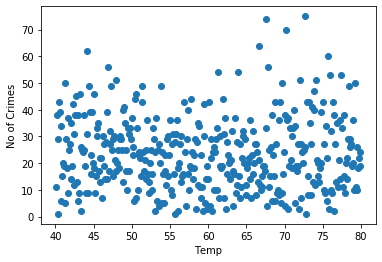

In [38]:
plt.scatter(crime_by_temp2.index,crime_by_temp2.values)
plt.xlabel('Temp')
plt.ylabel('No of Crimes')
plt.show()

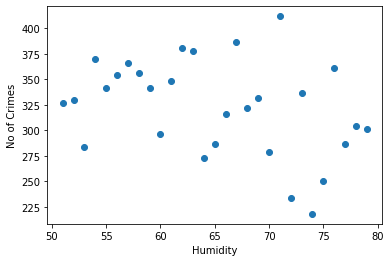

In [40]:
plt.scatter(crime_by_humid2.index,crime_by_humid2.values)
plt.xlabel('Humidity')
plt.ylabel('No of Crimes')
plt.show()

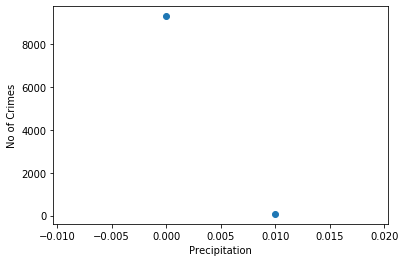

In [41]:
plt.scatter(crime_by_precip2.index,crime_by_precip2.values)
plt.xlabel('Precipitation')
plt.ylabel('No of Crimes')
plt.show()